In [3]:
!C:\Users\HP\AppData\Local\Programs\Python\Python312\python.exe -m pip install seaborn

import seaborn as sns

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [4]:
import sys
print(sys.executable)
!pip show seaborn


C:\Users\HP\AppData\Local\Programs\Python\Python312\python.exe
Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\hp\appdata\local\programs\python\python310\lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [5]:

print(sns.__version__)

0.13.2


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\HP\Documents\Titanic_ML_from_Disaster'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\HP\Documents\Titanic_ML_from_Disaster\Approach1.ipynb
C:\Users\HP\Documents\Titanic_ML_from_Disaster\Approach2.ipynb
C:\Users\HP\Documents\Titanic_ML_from_Disaster\.git\COMMIT_EDITMSG
C:\Users\HP\Documents\Titanic_ML_from_Disaster\.git\config
C:\Users\HP\Documents\Titanic_ML_from_Disaster\.git\description
C:\Users\HP\Documents\Titanic_ML_from_Disaster\.git\FETCH_HEAD
C:\Users\HP\Documents\Titanic_ML_from_Disaster\.git\HEAD
C:\Users\HP\Documents\Titanic_ML_from_Disaster\.git\index
C:\Users\HP\Documents\Titanic_ML_from_Disaster\.git\hooks\applypatch-msg.sample
C:\Users\HP\Documents\Titanic_ML_from_Disaster\.git\hooks\commit-msg.sample
C:\Users\HP\Documents\Titanic_ML_from_Disaster\.git\hooks\fsmonitor-watchman.sample
C:\Users\HP\Documents\Titanic_ML_from_Disaster\.git\hooks\post-update.sample
C:\Users\HP\Documents\Titanic_ML_from_Disaster\.git\hooks\pre-applypatch.sample
C:\Users\HP\Documents\Titanic_ML_from_Disaster\.git\hooks\pre-commit.sample
C:\Users\HP\Documents\Titanic_ML_

This script is used to recursively traverse through directories and list file paths in the `/kaggle/input` folder. The `os.walk()` function generates file names in a directory tree, walking either top-down or bottom-up.

Here’s how the script works:

1. `os.walk('/kaggle/input')`: Recursively iterates through the directory specified (`/kaggle/input` in this case). It returns a tuple for each directory in the tree, including:
   - `dirname`: Current directory path.
   - `_`: List of directories in the current `dirname` (not needed here, hence `_` is used as a placeholder).
   - `filenames`: List of files in the current `dirname`.

2. `os.path.join(dirname, filename)`: Combines the directory path (`dirname`) and file name (`filename`) into a complete path to the file.

3. `print()` prints out each full file path.

If you're working with a Kaggle notebook, this code helps you see the available files under `/kaggle/input`, which is commonly where datasets are stored.

### traverse through directories

In [4]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\HP\Documents\Titanic_ML_from_Disaster\Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

C:\Users\HP\Documents\Titanic_ML_from_Disaster\Dataset\gender_submission.csv
C:\Users\HP\Documents\Titanic_ML_from_Disaster\Dataset\test.csv
C:\Users\HP\Documents\Titanic_ML_from_Disaster\Dataset\test_modi.csv
C:\Users\HP\Documents\Titanic_ML_from_Disaster\Dataset\test_predictions.csv
C:\Users\HP\Documents\Titanic_ML_from_Disaster\Dataset\test_submission.csv
C:\Users\HP\Documents\Titanic_ML_from_Disaster\Dataset\train.csv
C:\Users\HP\Documents\Titanic_ML_from_Disaster\Dataset\train_modi.csv
C:\Users\HP\Documents\Titanic_ML_from_Disaster\Dataset\.ipynb_checkpoints\gender_submission-checkpoint.csv
C:\Users\HP\Documents\Titanic_ML_from_Disaster\Dataset\.ipynb_checkpoints\test_submission-checkpoint.csv


### Importing Training and Test Data

In [8]:
training = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

training['train_test'] = 1
test['train_test'] = 0

test['Survived'] = np.NaN

all_data = pd.concat([training,test])


1. **Reading the CSV Files:**
   ```python
   training = pd.read_csv('/kaggle/input/titanic/train.csv')
   test = pd.read_csv('/kaggle/input/titanic/test.csv')
   ```
   This reads the `train.csv` and `test.csv` files from the specified paths (likely from Kaggle's dataset directory) into pandas DataFrames.

2. **Adding a `train_test` Column:**
   ```python
   training['train_test'] = 1
   test['train_test'] = 0
   ```
   This adds a new column `train_test` to differentiate the datasets after concatenation:
   - `1` indicates the training set.
   - `0` indicates the test set.

3. **Adding a `Survived` Column to the Test Set:**
   ```python
   test['Survived'] = np.NaN
   ```
   Since the `Survived` column (the target variable) is only available in the training data, this line adds a `Survived` column with `NaN` values to the test set, as the actual survival outcomes are unknown.

4. **Combining Training and Test Data:**
   ```python
   all_data = pd.concat([training, test])
   ```
   This concatenates the training and test sets along the row axis (i.e., vertically), creating a unified `all_data` DataFrame. It is often done for preprocessing both datasets together before splitting them back for model training and testing.

5. **Displaying the Column Names:**
   ```python
   all_data.columns
   ```
   This will return the list of column names in the `all_data` DataFrame.

### Plotting Line:
   ```python
   %matplotlib inline
   ```
   This is a magic command for Jupyter Notebooks to display plots inline. This means that any plots generated using matplotlib will appear directly in the notebook.



In [9]:
%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

## Project Planning
When starting any project, I like to outline the steps that I plan to take. Below is the rough outline that I created for this project using commented cells.

In [10]:
# Understand nature of the data .info() .describe()
# Histograms and boxplots 
# Value counts 
# Missing data 
# Correlation between the metrics 
# Explore interesting themes 
    # Wealthy survive? 
    # By location 
    # Age scatterplot with ticket price 
    # Young and wealthy Variable? 
    # Total spent? 
# Feature engineering 
# preprocess data together or use a transformer? 
    # use label for train and test   
# Scaling?

# Model Baseline 
# Model comparison with CV 

### Light Data Exploration
#### 1) For numeric data
Made histograms to understand distributions
Corrplot
Pivot table comparing survival rate across numeric variables
#### 2) For Categorical Data
Made bar charts to understand balance of classes
Made pivot tables to understand relationship with survival

[Want more details on EDA? Check out this notebook:](https://www.kaggle.com/code/kenjee/basic-eda-example-section-6)

In [11]:
#quick look at our data types & null counts 
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [12]:
training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

In [13]:
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data 
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [14]:
#quick way to separate numeric columns
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [15]:
# look at numeric and categorical values separately 
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

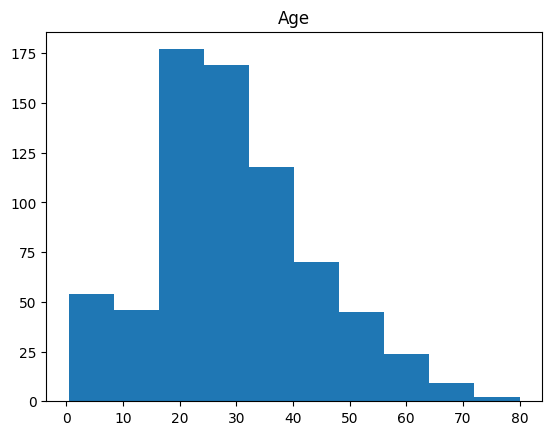

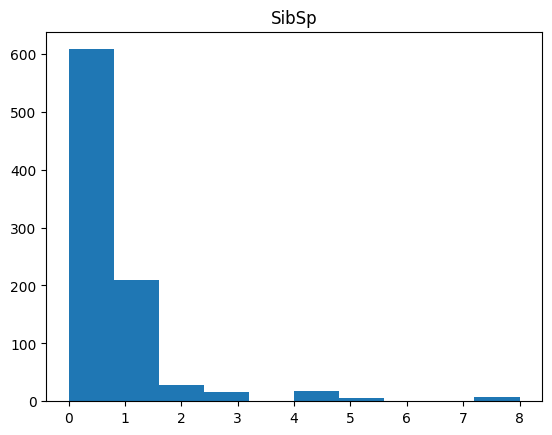

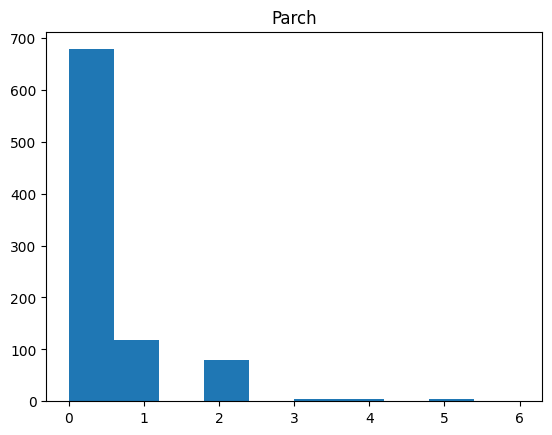

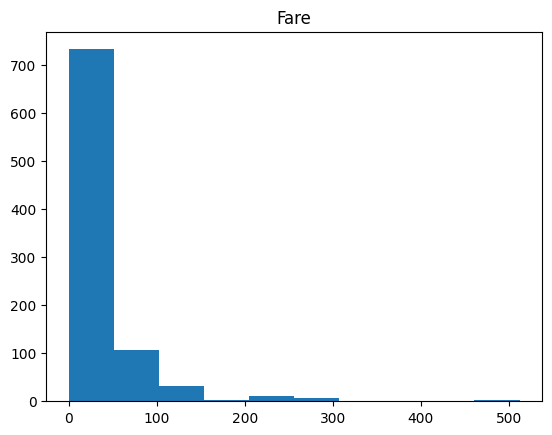

In [16]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Perhaps we should take the non-normal distributions and consider normalizing them?

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

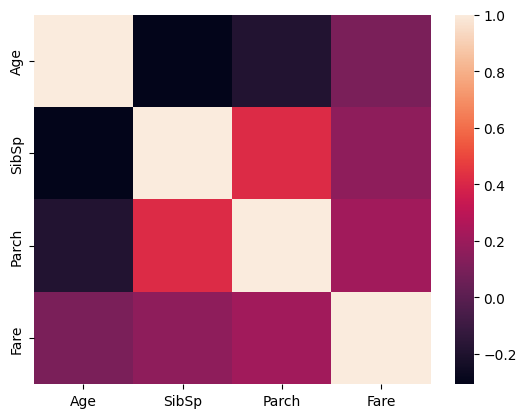

In [17]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [18]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


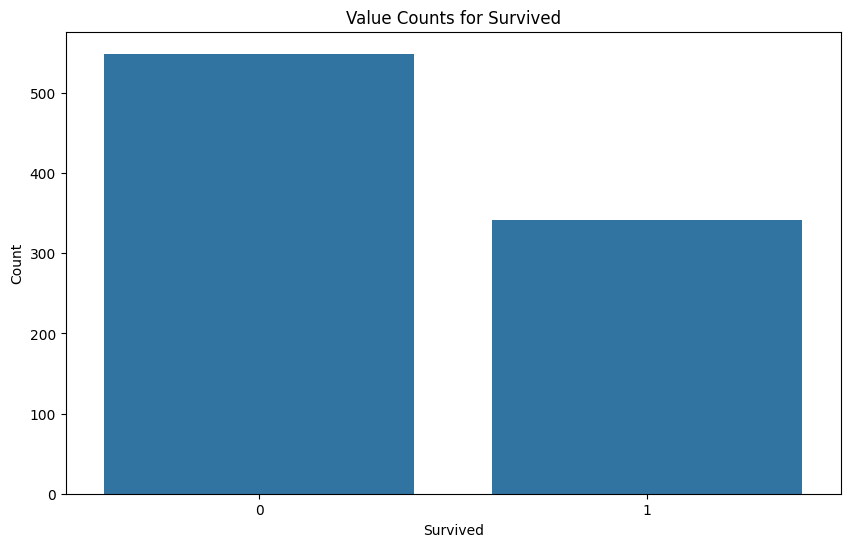

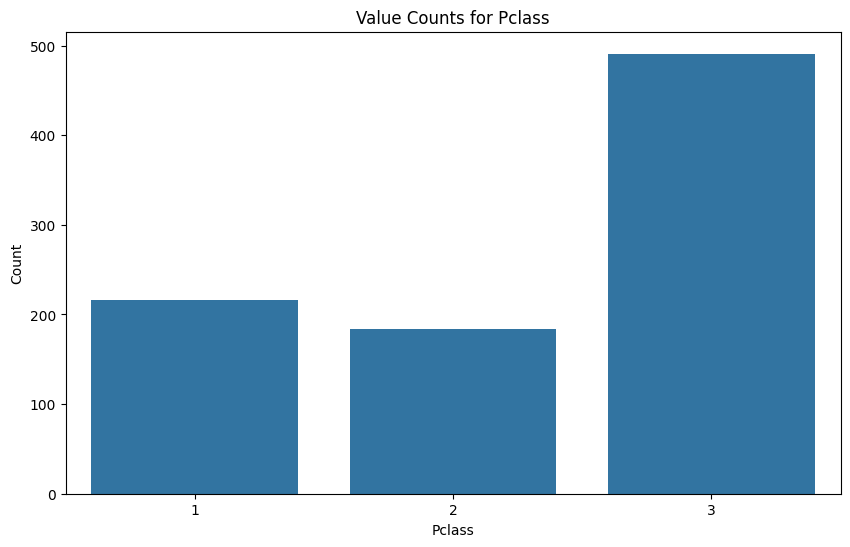

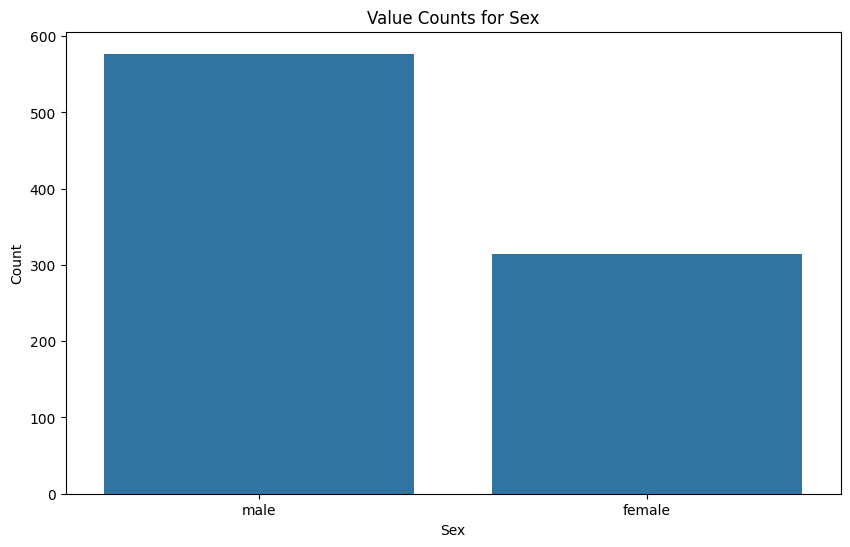

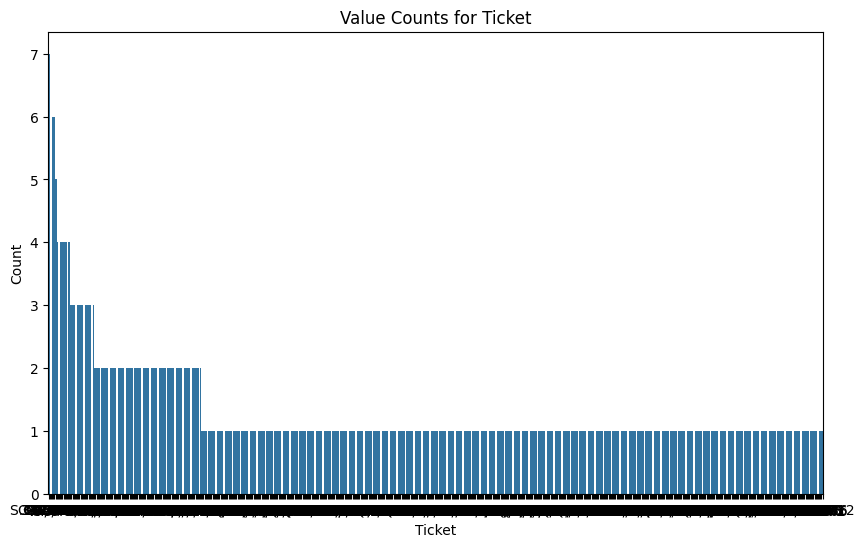

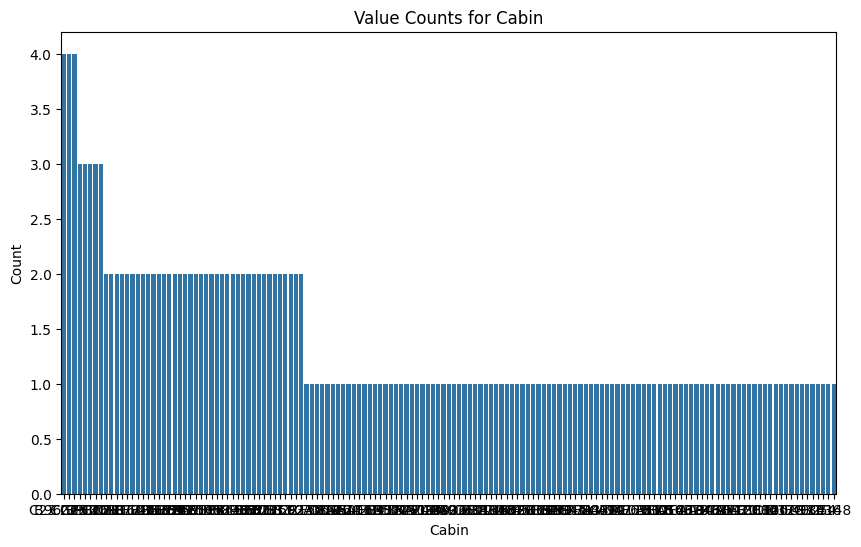

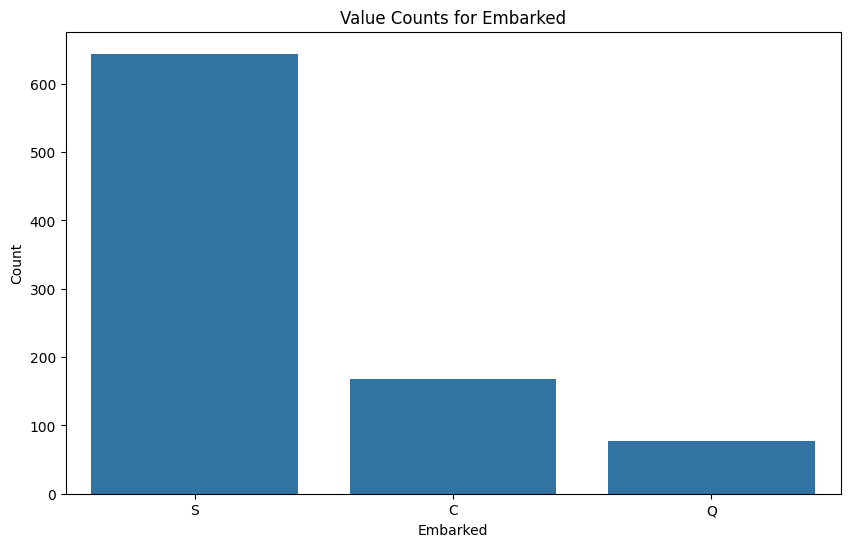

In [23]:
for i in df_cat.columns:
    plt.figure(figsize=(10, 6))  # Optional: adjust the size of each plot
    # Create a barplot of value counts
    ax = sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    # Set title and labels
    ax.set_title(f'Value Counts for {i}')
    ax.set_xlabel(i)
    ax.set_ylabel('Count')
    # Show the plot
    plt.show()

## Feature Engineering

Feature engineering is a crucial step in machine learning and data preprocessing. It involves creating new features or transforming existing features to improve the performance of a model. Here's an overview of key feature engineering techniques and concepts:

### 1. **Feature Creation**
- **Polynomial Features:** Create new features by raising existing features to a power or combining them.
  ```python
  from sklearn.preprocessing import PolynomialFeatures
  poly = PolynomialFeatures(degree=2)
  X_poly = poly.fit_transform(X)
  ```

- **Interaction Features:** Generate features that capture the interactions between existing features.
  ```python
  df['Feature1_Feature2'] = df['Feature1'] * df['Feature2']
  ```

- **Domain-Specific Features:** Create features based on domain knowledge. For example, in a Titanic dataset, you might create a feature indicating whether a passenger is traveling alone.

### 2. **Feature Transformation**
- **Normalization/Standardization:** Scale features to a similar range or distribution.
  ```python
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  ```

- **Log Transformation:** Apply a log transformation to skewed features.
  ```python
  df['Log_Feature'] = np.log1p(df['Feature'])
  ```

- **Binning/Bucketing:** Convert numerical features into categorical bins.
  ```python
  df['Age_Bin'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, np.inf], labels=['0-18', '19-30', '31-45', '46-60', '60+'])
  ```

### 3. **Feature Encoding**
- **One-Hot Encoding:** Convert categorical variables into binary columns.
  ```python
  df_encoded = pd.get_dummies(df, columns=['CategoricalFeature'])
  ```

- **Label Encoding:** Convert categorical variables into numeric values.
  ```python
  from sklearn.preprocessing import LabelEncoder
  encoder = LabelEncoder()
  df['EncodedFeature'] = encoder.fit_transform(df['CategoricalFeature'])
  ```

- **Frequency Encoding:** Encode categorical features based on the frequency of each category.
  ```python
  freq_encoding = df['CategoricalFeature'].value_counts().to_dict()
  df['Freq_EncodedFeature'] = df['CategoricalFeature'].map(freq_encoding)
  ```

### 4. **Feature Selection**
- **Remove Low Variance Features:** Drop features with little variation.
  ```python
  from sklearn.feature_selection import VarianceThreshold
  selector = VarianceThreshold(threshold=0.01)
  X_high_variance = selector.fit_transform(X)
  ```

- **Correlation Analysis:** Remove highly correlated features to avoid multicollinearity.
  ```python
  corr_matrix = df.corr()
  high_corr_vars = [col for col in corr_matrix.columns if any(corr_matrix[col] > 0.9)]
  df_reduced = df.drop(columns=high_corr_vars)
  ```

- **Feature Importance:** Use model-based methods to select important features.
  ```python
  from sklearn.ensemble import RandomForestClassifier
  model = RandomForestClassifier()
  model.fit(X, y)
  importances = model.feature_importances_
  ```

### 5. **Handling Missing Values**
- **Imputation:** Replace missing values with mean, median, or a constant.
  ```python
  from sklearn.impute import SimpleImputer
  imputer = SimpleImputer(strategy='mean')
  X_imputed = imputer.fit_transform(X)
  ```

- **Feature Engineering for Missing Data:** Create a feature indicating whether a value was missing.
  ```python
  df['Feature_Missing'] = df['Feature'].isnull().astype(int)
  ```

### 6. **Time Series Feature Engineering**
- **Date/Time Features:** Extract features like day of the week, month, year, etc.
  ```python
  df['Day_of_Week'] = df['Date'].dt.dayofweek
  ```

- **Lag Features:** Create features based on past values in time series data.
  ```python
  df['Lag_1'] = df['Value'].shift(1)
  ```

### 7. **Text Feature Engineering**
- **Bag of Words:** Convert text data into numerical feature vectors.
  ```python
  from sklearn.feature_extraction.text import CountVectorizer
  vectorizer = CountVectorizer()
  X_text = vectorizer.fit_transform(df['Text'])
  ```

- **TF-IDF:** Transform text data based on Term Frequency-Inverse Document Frequency.
  ```python
  from sklearn.feature_extraction.text import TfidfVectorizer
  vectorizer = TfidfVectorizer()
  X_tfidf = vectorizer.fit_transform(df['Text'])
  ```



In [25]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)¶
2) Tickets - Do different ticket types impact survival rates?
3) Does a person's title relate to survival rates?

In [26]:
df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
training['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [27]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [28]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

In [29]:
#comparing surivial rate by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [30]:
#understand ticket values better 
#numeric vs non numeric 
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [31]:
training['numeric_ticket'].value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [35]:
#lets us view all rows in dataframe through scrolling. This is for convenience 
pd.set_option("display.max_rows", None)
training['ticket_letters'].value_counts()

ticket_letters
a5        1
pc        1
stono2    1
0         1
ca        1
Name: count, dtype: int64

In [36]:
#difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

KeyError: 'Survived'